## Table of contents
### Data preprocessing
  - pandas setting
  - meta_data
  - 결측치 처리
  - Labeling
  - Scaling

### Classification Model
  - Decision tree
  - Random Forest
  - Naive Bayes

### Classification Metrics
  - Confusion Matrix
  - Accuracy
  - Precision, Recall, F1 score
  - ROC-AUC

In [1]:
import pandas as pd
import numpy as np

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### Pandas setting

https://pandas.pydata.org/pandas-docs/dev/user_guide/options.html

In [2]:
print('pandas default set : pd.options.display.max_rows',pd.options.display.max_rows)
print('pandas default set : pd.get_option("max_rows")', pd.get_option('max_rows'),end='\n\n')

print('pandas default set : pd.options.display.max_columns',pd.options.display.max_columns)
print('pandas default set : pd.get_option("max_columns")', pd.get_option('max_columns'))

pandas default set : pd.options.display.max_rows 60
pandas default set : pd.get_option("max_rows") 60

pandas default set : pd.options.display.max_columns 20
pandas default set : pd.get_option("max_columns") 20


In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/'

Mounted at /content/drive


#### Data : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Datascience_code/data/house_price/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### display

In [6]:
display(data.describe(),data.isna().sum())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
pd.options.display.max_rows=100 # pd.set_option('max_rows', 100)
# pd.options.display.max_columns=100

In [8]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
# 결측치 확인
data.isna().sum()[data.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### meta data

In [10]:
meta_data=pd.DataFrame(index=data.columns)
meta_data['Dtype']=data.dtypes
meta_data['NaN']=data.isnull().sum()
meta_data['mean']=data.mean()
meta_data['max']=data.max()
meta_data['min']=data.min()
meta_data['unique']=[data[i].unique() for i in data.columns]
meta_data['nunique']=[data[i].nunique() for i in data.columns]
meta_data

,Dtype,NaN,mean,max,min,unique,nunique
Id,int64,0,730.500000,1460,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1460
MSSubClass,int64,0,56.897260,190,20,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",15
MSZoning,object,0,NaN,RM,C (all),"[RL, RM, C (all), FV, RH]",5
LotFrontage,float64,259,70.049958,313.0,21.0,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110
LotArea,int64,0,10516.828082,215245,1300,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",1073
Street,object,0,NaN,Pave,Grvl,"[Pave, Grvl]",2
Alley,object,1369,NaN,NaN,NaN,"[nan, Grvl, Pave]",2
LotShape,object,0,NaN,Reg,IR1,"[Reg, IR1, IR2, IR3]",4
LandContour,object,0,NaN,Lvl,Bnk,"[Lvl, Bnk, Low, HLS]",4
Utilities,object,0,NaN,NoSeWa,AllPub,"[AllPub, NoSeWa]",2


In [11]:
np.sort(data['MSZoning'].unique())

array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)

In [12]:
data['MSZoning'].max()

'RM'

In [13]:
data['MSZoning'].min()

'C (all)'

## Data preprocessing
**다음 수업에 자세한 내용**
- 결측치 처리
- Numerical features : Scaling
- Categorical features : Labeling

#### 결측치 처리

In [14]:
data.shape

(1460, 81)

In [15]:
na_feat=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
data.drop(na_feat,inplace=True, axis=1)

In [16]:
data.shape

(1460, 76)

In [17]:
# Target feature 지정
y = data['SalePrice']

In [18]:
data.drop(['Id','SalePrice'],axis=1,inplace=True)

In [19]:
for i in data.columns[data.isna().sum()>0]:
    if data[i].dtype == 'object':
        data[i]=data[i].fillna('None')
    else :
        data[i]=data[i].fillna(-1)

In [20]:
print('Total nan :',data.isna().sum().sum())

Total nan : 0


#### Scaling

 MinMaxScaler : [0,1]<br>
  #### $\frac{x-min}{max-min}$<br><br>

* fit > training
* transform > predict

In [21]:
numerical_f=list(data.columns[data.dtypes!='object'])
numerical_f.remove('YrSold')
print(numerical_f)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [22]:
data['YrSold']=data['YrSold'].astype('object')

In [23]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data[numerical_f]=scaler.fit_transform(data[numerical_f])

In [25]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,RL,0.210191,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,2008,WD,Normal
1,0.000000,RL,0.257962,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,2007,WD,Normal
2,0.235294,RL,0.219745,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,2008,WD,Normal
3,0.294118,RL,0.194268,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,2006,WD,Abnorml
4,0.235294,RL,0.270701,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,2008,WD,Normal


#### Labeling
#### Label encoding
[출처] https://huntdatascience.wordpress.com/2019/07/26/encoding-categorical-variables/

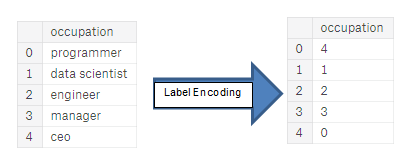

In [26]:
categorical_f=list(data.columns[data.dtypes=='object'])
print(categorical_f)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition']


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in categorical_f:
  data[i]=encoder.fit_transform(data[i])

In [28]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,3,0.210191,0.033420,1,3,3,0,4,0,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,2,8,4
1,0.000000,3,0.257962,0.038795,1,3,3,0,2,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,1,8,4
2,0.235294,3,0.219745,0.046507,1,0,3,0,4,0,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,2,8,4
3,0.294118,3,0.194268,0.038561,1,0,3,0,0,0,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0,8,0
4,0.235294,3,0.270701,0.060576,1,0,3,0,2,0,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,2,8,4


#### Target data encoding for classification

In [29]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [30]:
encoded_y=pd.cut(y,5,labels=[1,2,3,4,5])
encoded_y

0       2
1       2
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: SalePrice, Length: 1460, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [31]:
encoded_y.value_counts()

1    871
2    508
3     70
4      7
5      4
Name: SalePrice, dtype: int64

### Train_test_split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
print(data.shape, encoded_y.shape)

(1460, 74) (1460,)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(data, encoded_y, test_size=0.2, random_state=0)

In [35]:
print('train data :',x_train.shape, y_train.shape)
print('test data :',x_test.shape, y_test.shape)

train data : (1168, 74) (1168,)
test data : (292, 74) (292,)


## Classification Model
- Decision tree
- Randomforest
- Naive Bayes

#### Decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0) # max_depth=None, criterion='gini', random_state=None

In [37]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
dt_pred=dt.predict(x_test)
dt_pred

array([2, 1, 1, 2, 1, 1, 2, 1, 5, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 4, 2, 2, 1, 1, 3, 5, 1, 1, 1, 1,
       3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 2, 3, 1, 1, 1])

In [39]:
dt.predict_proba(x_test)

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [40]:
from sklearn.tree import export_graphviz
import graphviz

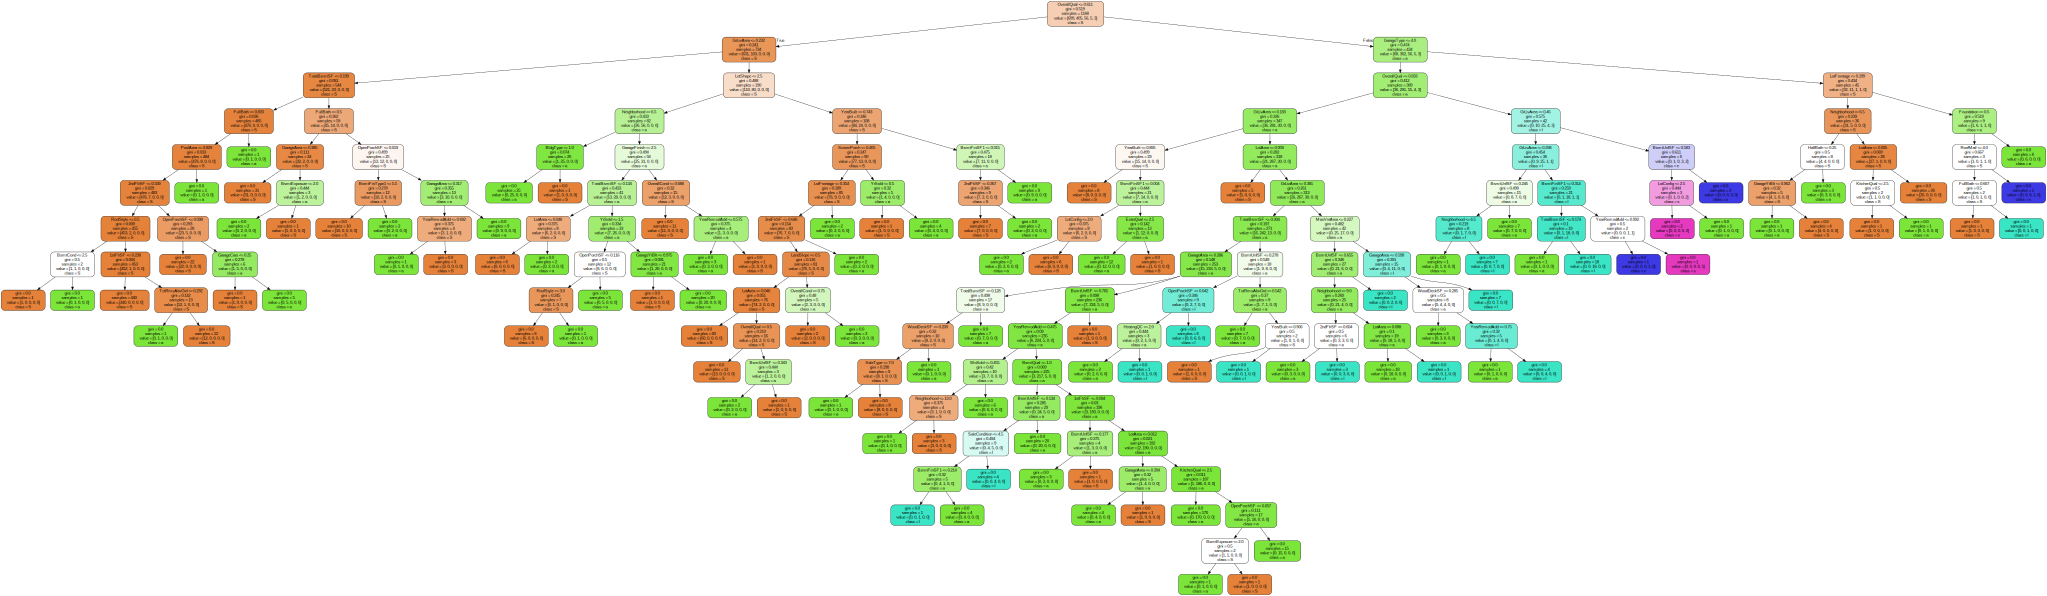

In [41]:
export_graphviz(dt, out_file='tree.dot', 
               feature_names = x_train.columns,
                class_names = 'SalesPrice',
                #max_depth = 3, # 최대 depth
                precision = 3, # 소수점 자릿수
                filled = True, # class별 color
                rounded=True, # 둥근 박스
               )

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph) 

#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

In [43]:
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_pred

array([2, 1, 1, 2, 1, 1, 2, 1, 5, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 1, 1, 1,
       3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 2, 1,
       1, 2, 3, 1, 1, 1])

In [44]:
rf.predict_proba(x_test)

array([[0.29, 0.57, 0.13, 0.01, 0.  ],
       [0.97, 0.03, 0.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  , 0.  , 0.  ],
       ...,
       [0.67, 0.31, 0.01, 0.01, 0.  ],
       [0.98, 0.02, 0.  , 0.  , 0.  ],
       [0.98, 0.02, 0.  , 0.  , 0.  ]])

### Naive Bayes
[출처] https://ko.wikipedia.org/wiki/%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88_%EB%B6%84%EB%A5%98

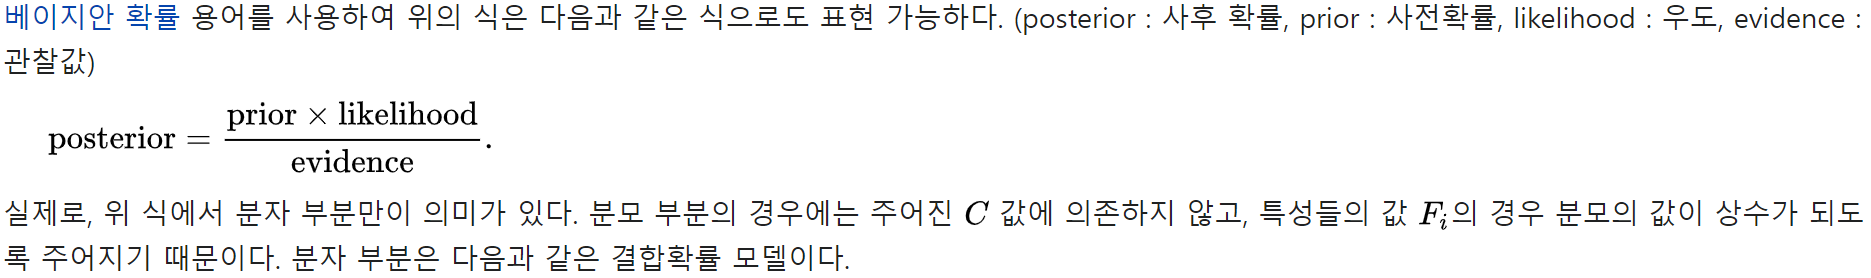

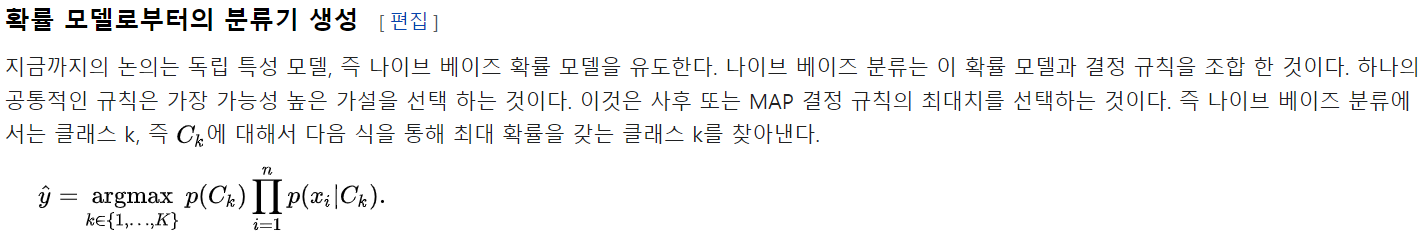

https://scikit-learn.org/stable/modules/naive_bayes.html
#### x가 서로 독립임을 가정. > PCA(eigan vector)

* Gaussian Naive Bayes
* Multinomial Naive Bayes
* Bernoulli Naive Bayes
* Categorical Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [46]:
?gnb

In [47]:
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)
gnb_pred

array([1, 1, 1, 3, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3,
       1, 3, 3, 1, 3, 1, 4, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3,
       3, 1, 2, 1, 3, 1, 4, 3, 3, 1, 2, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 2, 1, 3, 1,
       1, 3, 3, 1, 3, 3, 4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 3,
       1, 3, 1, 2, 1, 3, 1, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 1,
       3, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 4, 3, 1, 3, 3, 1, 1, 2, 2, 3, 2, 3, 1,
       3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 1, 1,
       3, 4, 3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 4, 1, 1, 3, 1,
       1, 3, 2, 1, 1, 1])

In [48]:
gnb.predict_proba(x_test)

array([[1.00000000e+00, 7.36983845e-22, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 9.65584854e-17, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [9.99999994e-01, 4.24715502e-10, 6.07267691e-09, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [1.00000000e+00, 9.83021126e-45, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.35116244e-60, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.89969553e-39, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

#### Save trained-model

In [49]:
# from sklearn.externals import joblib

import joblib

joblib.dump(gnb, './model_temp.pkl') # save

loaded_model = joblib.load('./model_temp.pkl') # load

In [50]:
loaded_model.predict(x_test) == gnb_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Classification metrics
https://neptune.ai/blog/evaluation-metrics-binary-classification

- Confusion Matrix
- Accuracy
- Presicion, Recall, F1 score
- AUC-ROC

#### Confusion Matrix
* Binary classification<br>

[출처] https://medium.com/@spraks/what-is-confusion-matrix-71d4028e8e3

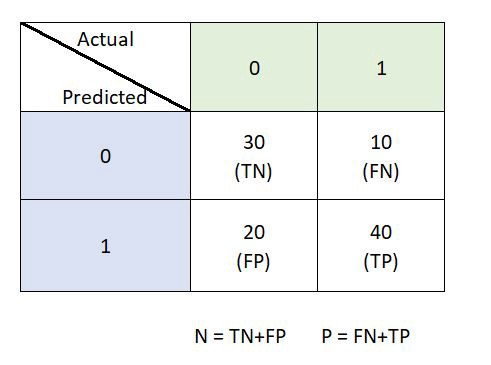

In [51]:
from sklearn.metrics import confusion_matrix

b_y_true = [0, 1, 0, 1]
b_y_pred = [1, 1, 1, 0]

m_y_true = [0, 2, 1, 2]
m_y_pred = [0, 1, 2, 2]

In [52]:
confusion_matrix(b_y_true, b_y_pred)

array([[0, 2],
       [1, 1]])

In [53]:
tn, fp, fn, tp = confusion_matrix(b_y_true, b_y_pred).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

In [54]:
confusion_matrix(m_y_true,m_y_pred)

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 1]])

#### Accuracy

* In binary classification
$\frac{TP+TN}{TP+TN+FP+FN}$

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(b_y_true, b_y_pred)

0.25

In [56]:
(tp + tn) / (tp + tn + fp + fn)

0.25

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(m_y_true, m_y_pred)

0.5

In [58]:
(np.array(m_y_true)==np.array(m_y_pred)).sum()/len(m_y_true)

0.5

In [59]:
np.trace(confusion_matrix(m_y_true,m_y_pred)) / len(m_y_true) # np.trace : 대각합

0.5

#### Precision, Recall, F1 score



* $ Precision = \frac{tp}{tp+fp} $ <br><br>

In [60]:
from sklearn.metrics import precision_score

precision=precision_score(b_y_true, b_y_pred)
precision

0.3333333333333333

In [61]:
tp / (tp + fp)

0.3333333333333333

* $ Recall = \frac{tp}{tp+fn} $ <br><br>

In [62]:
from sklearn.metrics import recall_score

recall=recall_score(b_y_true, b_y_pred)
recall

0.5

In [63]:
tp / (tp + fn)

0.5

* $ F1 score = 2 * \frac{precision * recall}{precision + recall} $

In [64]:
from sklearn.metrics import f1_score

f1=f1_score(b_y_true, b_y_pred)
f1

0.4

In [65]:
2 * precision * recall / (precision+recall)

0.4

#### ROC-AUC
* ROC curve(receiver operating characteristic curve)
* ACU(Area Under the ROC Curve)
* class 분포가 다를 때  accuracy의 단점을 보완
* AUC가 클 수록 안정적

* True Positive Rate(TPR)<br>
$TPR = \frac{TP}{TP+FN}$
<br><br>

* False Positive Rate(FPR)<br>
$FPR = \frac{FP}{FP+TN}$


[출처] https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

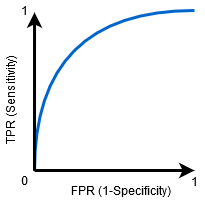

In [66]:
from sklearn.metrics import auc, roc_curve

auc_true = np.array([0, 0, 1, 1])
auc_pred = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thres = roc_curve(auc_true, auc_pred)

auc_score=auc(fpr, tpr)
auc_score

0.75